In [1]:
import pandas as pd

data=pd.read_csv('multilabel_nlp_classification.csv')

data_p=data.loc[:,['id','movie decription','Thriller', 'Mystery',
       'Sci-Fi', 'Romance', 'Horror', 'Fantasy', 'Musical', 'Family', 'Action',
       'Biography', 'Crime', 'Animation', 'Comedy', 'Drama', 'History',
       'Adventure']]


In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [3]:


import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
data_p.head()

,id,movie decription,Thriller,Mystery,Sci-Fi,Romance,Horror,Fantasy,Musical,Family,Action,Biography,Crime,Animation,Comedy,Drama,History,Adventure
0,0,\n In a future where mutants are nearly ext...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1,\n When a pilot crashes and tells of confli...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,2,\n Thor (Chris Hemsworth) is imprisoned on ...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,3,\n The Guardians struggle to keep together ...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,4,"\n Allied soldiers from Belgium, the Britis...",0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [5]:

print("Number of rows in data =",data_p.shape[0])
print("Number of columns in data =",data_p.shape[1])

print("\n")

Number of rows in data = 6116
Number of columns in data = 18




In [6]:
missing_values_check = data_p.isnull().sum()
print(missing_values_check)

id                  0
movie decription    0
Thriller            0
Mystery             0
Sci-Fi              0
Romance             0
Horror              0
Fantasy             0
Musical             0
Family              0
Action              0
Biography           0
Crime               0
Animation           0
Comedy              0
Drama               0
History             0
Adventure           0
dtype: int64


In [7]:
categories = list(data_p.columns.values)
categories = categories[2:]
print(categories)

['Thriller', 'Mystery', 'Sci-Fi', 'Romance', 'Horror', 'Fantasy', 'Musical', 'Family', 'Action', 'Biography', 'Crime', 'Animation', 'Comedy', 'Drama', 'History', 'Adventure']


In [8]:
counts = []
for category in categories:
    counts.append((category, data_p[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,Thriller,1112
1,Mystery,834
2,Sci-Fi,973
3,Romance,139
4,Horror,695
5,Fantasy,1390
6,Musical,278
7,Family,139
8,Action,3753
9,Biography,556


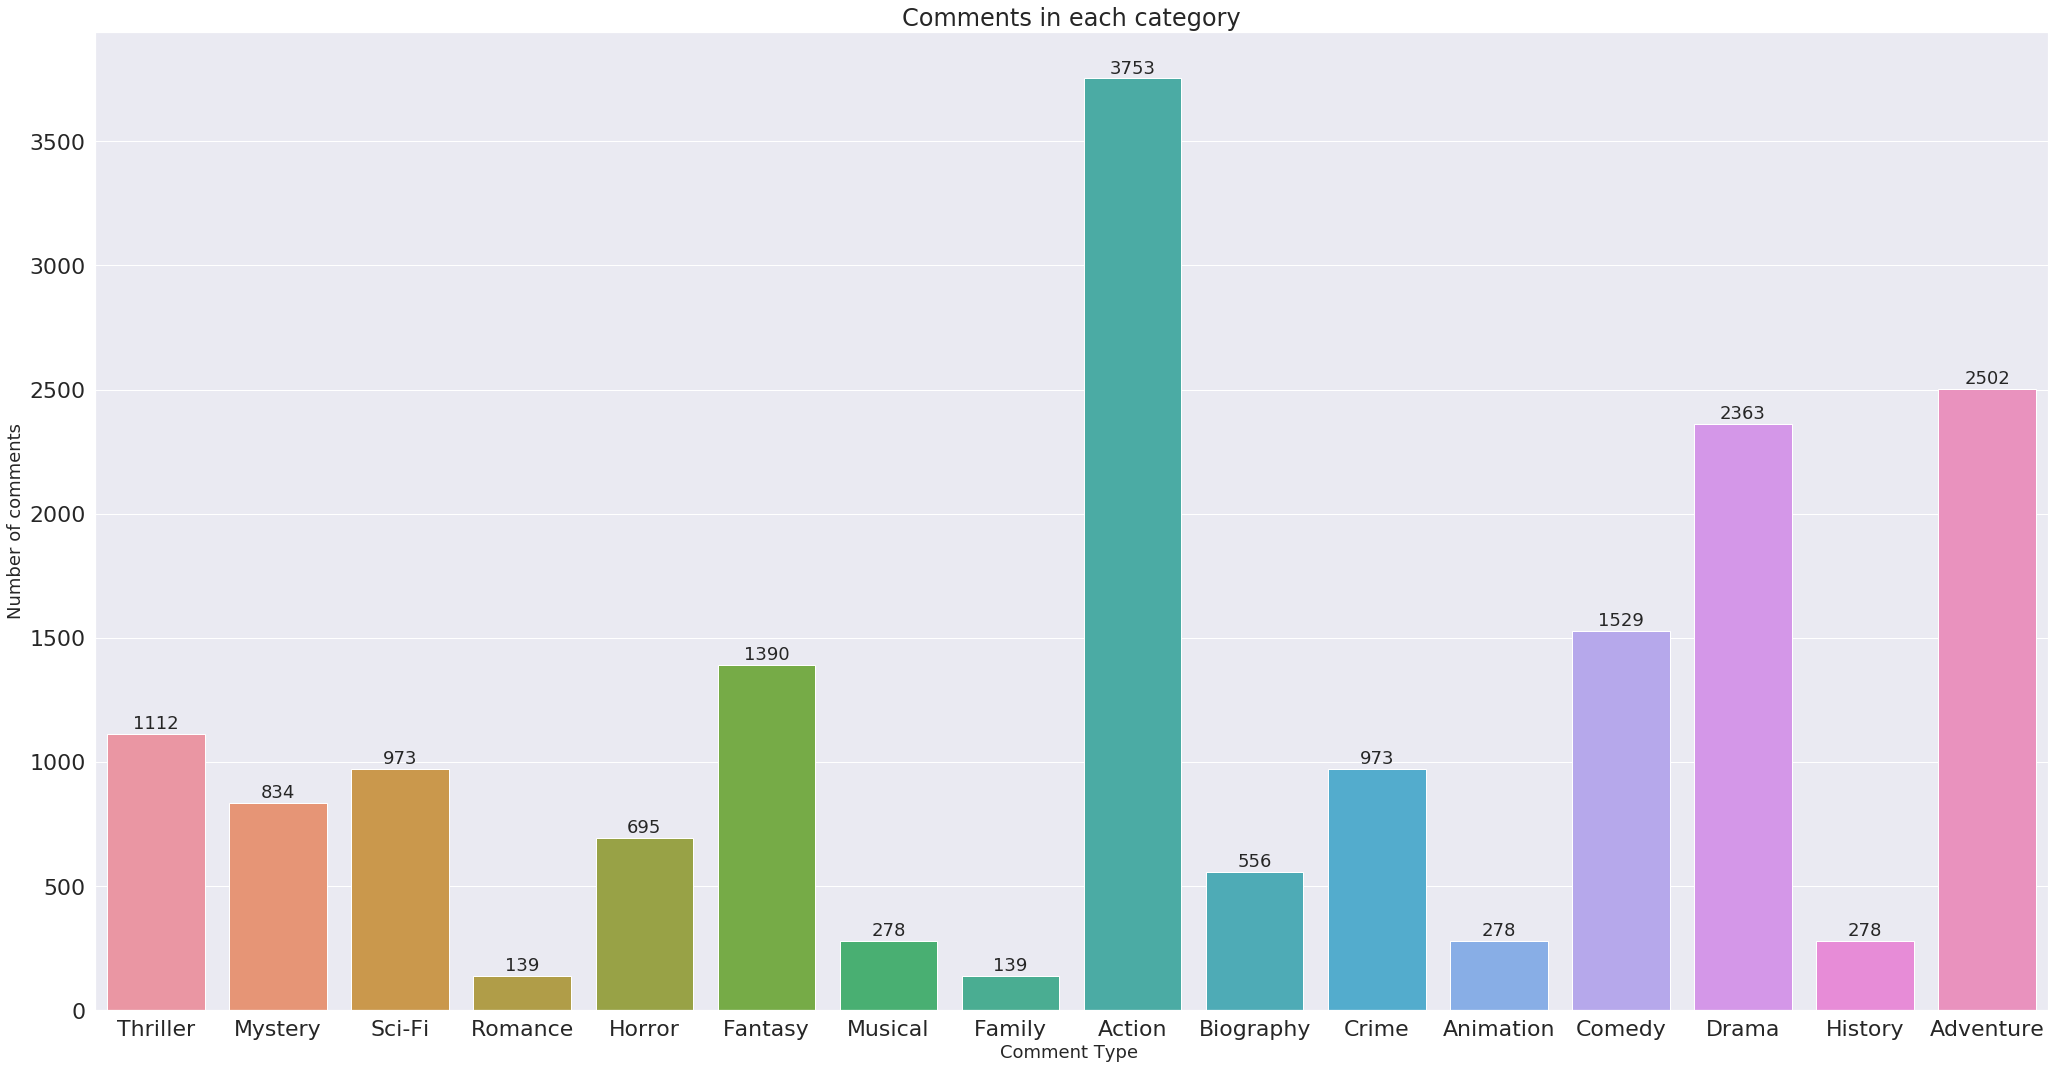

In [9]:
sns.set(font_scale = 2)
plt.figure(figsize=(35,18))

ax= sns.barplot(categories, data_p.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_p.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [11]:
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [12]:
data_p['movie decription'] = data_p['movie decription'].str.lower()
data_p['movie decription'] = data_p['movie decription'].apply(cleanPunc)
data_p['movie decription'] = data_p['movie decription'].apply(keepAlpha)
data_p.head()

,id,movie decription,Thriller,Mystery,Sci-Fi,Romance,Horror,Fantasy,Musical,Family,Action,Biography,Crime,Animation,Comedy,Drama,History,Adventure
0,0,in a future where mutants are nearly extinct a...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1,when a pilot crashes and tells of conflict in ...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,2,thor chris hemsworth is imprisoned on the plan...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,3,the guardians struggle to keep together as a t...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,4,allied soldiers from belgium the british empir...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [13]:


stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data_p['movie decription'] = data_p['movie decription'].apply(removeStopWords)
data_p.head()



,id,movie decription,Thriller,Mystery,Sci-Fi,Romance,Horror,Fantasy,Musical,Family,Action,Biography,Crime,Animation,Comedy,Drama,History,Adventure
0,0,future mutants nearly extinct elderly we...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1,pilot crashes tells conflict outside wor...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,2,thor chris hemsworth imprisoned planet saka...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,3,guardians struggle keep together team dea...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,4,allied soldiers belgium british empire fran...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:


from sklearn.model_selection import train_test_split

train, test = train_test_split(data_p, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)



(4281, 18)
(1835, 18)


In [16]:


train_text = train['movie decription']
test_text = test['movie decription']



In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [18]:


x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','movie decription'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','movie decription'], axis=1)



In [19]:


from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier



In [20]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing Thriller comments...**

Test accuracy is 1.0




**Processing Mystery comments...**

Test accuracy is 1.0




**Processing Sci-Fi comments...**

Test accuracy is 1.0




**Processing Romance comments...**

Test accuracy is 1.0




**Processing Horror comments...**

Test accuracy is 1.0




**Processing Fantasy comments...**

Test accuracy is 1.0




**Processing Musical comments...**

Test accuracy is 1.0




**Processing Family comments...**

Test accuracy is 1.0




**Processing Action comments...**

Test accuracy is 1.0




**Processing Biography comments...**

Test accuracy is 1.0




**Processing Crime comments...**

Test accuracy is 1.0




**Processing Animation comments...**

Test accuracy is 1.0




**Processing Comedy comments...**

Test accuracy is 1.0




**Processing Drama comments...**

Test accuracy is 1.0




**Processing History comments...**

Test accuracy is 1.0




**Processing Adventure comments...**

Test accuracy is 1.0


CPU times: user 554 ms, sys: 250 ms, total: 804 ms
Wall time: 11.6 s


In [24]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  1.0


CPU times: user 6.86 s, sys: 3.52 s, total: 10.4 s
Wall time: 10.4 s


In [ ]:
!pip install scikit-multilearn

In [25]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression


# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")


Accuracy =  1.0




In [26]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  1.0


In [27]:

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))


Accuracy =  1.0


### Test

In [28]:
text='In a future where mutants are nearly extinct, an elderly and weary Logan leads a quiet life. But when Laura, a mutant child pursued by scientists, comes to him for help, he must get her to safety.'

In [29]:
text1=cleanPunc(text)

In [30]:
text2=keepAlpha(text1)

In [31]:
text3=removeStopWords(text2)

In [ ]:
#vect = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')

In [32]:
vectorizer.fit([text3])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [33]:
doc_tfidf = vectorizer.transform([data_p['movie decription'][0]])

In [34]:
doc_tfidf.shape

(1, 57)

In [35]:
x_test.shape

(1835, 1859)

In [36]:
x_train.shape

(4281, 1859)


#### This does not work as our matrix has 57 columns and our model is trained on 1859 features I am not yet able to get the solution will implement it once get a solution

classifier.predict(doc_tfidf)

Reference:

https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/